## Import libraries and data fram

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
path=r'C:\Users\niels\Documents\Master Folder - Instacart Basket Analysis 09.10

In [3]:
df_prods_ords_merged = pd.read_pickle(os.path.join(path, 'orders_products_merged.pkl'))

In [4]:
df_prods_ords_merged.shape

(32404859, 16)

In [5]:
# create a subset from data frame
df = df_prods_ords_merged[:1000000]

In [6]:
# def function to sort price ranges/price_label
def price_lable(row):
    if row['prices'] <= 5: 
        return 'Low-range product'
    elif (row['prices']>5) and (row['prices']<=15):
        return 'Mid-range product'
    elif row['prices'] >= 15:
        return 'High range'
    else: 
        return 'Not enough data'

In [7]:
# sort price ranges using user defined function/Apply the function
df['price_range'] = df.apply(price_lable, axis=1)

C:\Users\allsa\AppData\Local\Temp\ipykernel_2972\2509192823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_lable, axis=1)


In [8]:
df.head()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1      True             1          2                  8   
1   2398795        1      True             2          3                  7   
2    473747        1      True             3          3                 12   
3   2254736        1      True             4          4                  7   
4    431534        1      True             5          4                 15   

   days_since_prior_order  new_customer  product_id  add_to_cart_order  \
0                     NaN          True         196                  1   
1                    15.0         False         196                  1   
2                    21.0         False         196                  1   
3                    29.0         False         196                  1   
4                    28.0         False         196                  1   

   reordered _merge product_name  aisle_id  department_id  prices  \
0      False   both         Soda        77              7     9.0   
1       True   both         Soda        77              7     9.0   
2       True   both         Soda        77              7     9.0   
3       True   both         Soda        77              7     9.0   
4       True   both         Soda        77              7     9.0   

         price_range  
0  Mid-range product  
1  Mid-range product  
2  Mid-range product  
3  Mid-range product  
4  Mid-range product

In [10]:
df['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

# If -statements with the loc() function for subset data

In [9]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\allsa\AppData\Local\Temp\ipykernel_2972\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [10]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [11]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [12]:
df['price_range_loc'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

# If -statements with the loc() function for whole data frame

In [13]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [14]:
df_prods_ords_merged.loc[(df_prods_ords_merged['prices'] <= 15) & (df_prods_ords_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [15]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [16]:
# count the price ranges in the data frame
df_prods_ords_merged['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [17]:
# Rename'order_dow' to 'orders_day_of_the_week'
df_prods_ords_merged = df_prods_ords_merged.rename(columns={'order_dow': 'orders_day_of_week'})
df_prods_ords_merged.head()

order_id  user_id  eval_set  order_number  orders_day_of_week  \
0   2539329        1      True             1                   2   
1   2398795        1      True             2                   3   
2    473747        1      True             3                   3   
3   2254736        1      True             4                   4   
4    431534        1      True             5                   4   

   order_hour_of_day  days_since_prior_order  new_customer  product_id  \
0                  8                     NaN          True         196   
1                  7                    15.0         False         196   
2                 12                    21.0         False         196   
3                  7                    29.0         False         196   
4                 15                    28.0         False         196   

   add_to_cart_order  reordered _merge product_name  aisle_id  department_id  \
0                  1      False   both         Soda        77              7   
1                  1       True   both         Soda        77              7   
2                  1       True   both         Soda        77              7   
3                  1       True   both         Soda        77              7   
4                  1       True   both         Soda        77              7   

   prices    price_range_loc  
0     9.0  Mid-range product  
1     9.0  Mid-range product  
2     9.0  Mid-range product  
3     9.0  Mid-range product  
4     9.0  Mid-range product

In [18]:
# determine the busies days for ordering
df_prods_ords_merged['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [19]:
# define new variable 'busiest day' using for loop
result = []

for value in df_prods_ords_merged['orders_day_of_week']:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [20]:
len(result)

32404859

In [21]:
df_prods_ords_merged['busiest_day'] = result
df_prods_ords_merged['busiest_day'].value_counts()

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Exercise 4.7

In [22]:
#2: creating new variable 'busiest days'
result2 = []

for value in df_prods_ords_merged['orders_day_of_week']:
  if value in [0,1]:result2.append("Busiest days")
  elif value in [3,4]:result2.append("Slowest days")
  else:result2.append("Regularly busy")

In [23]:
len(result2)

32404859

In [24]:
df_prods_ords_merged['busiest_days'] = result2
df_prods_ords_merged['busiest_days'].value_counts()

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [25]:
6204182 + 5660230 

11864412

In [26]:
3840534 + 3783802

7624336

 Step 3: The total number of busiest days the sum of 0 & 1 (11864412) and slowest day (7624336).

In [27]:
# Step 4: determine the busiest hours of the day
df_time = df_prods_ords_merged['order_hour_of_day'].value_counts()
df_time

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

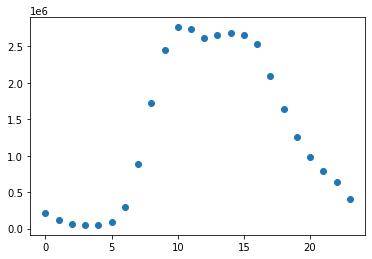

In [28]:
time = list(df_time.index)
frequency = list(df_time)
import matplotlib.pyplot as plt
plt.plot(time, frequency, 'o')

The graph suggest 9 to 16 - 'Most orders', 0 to 6 -'Fewest orders' 

In [29]:
# define variable â€œbusiest_period_of_dayâ€

result3 = []

for value in df_prods_ords_merged['order_hour_of_day']:
  if value>=9 and value<=16:
    result3.append("Most orders")
  elif value<=6:
    result3.append("Fewest orders")
  else:
    result3.append("Average orders")

In [30]:
df_prods_ords_merged['busiest_period_of_day'] = result3
df_prods_ords_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders    10399967
Fewest orders       886821
Name: busiest_period_of_day, dtype: int64

#Export dataframe as a pickle file

In [32]:
df_prods_ords_merged.to_pickle(os.path.join(path, 'orders_products_merged_v2.pkl'))